## Recommendations to NGO

With 9 Variables, we have to recommend country name to NGO for funding

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing all datasets
Country_data= pd.read_csv("C:/Users/vinay/Documents/IIIT-Bangalore/PCA Assignment/Country-data.csv")


In [3]:
print(len(Country_data))


167


### Let's understand the structure of our dataframe

In [4]:
# Let's see the head of our master dataset
Country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
Country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108982,6.815689,46.890240,17144.688623,7.781916,70.555689,2.947964,12964.155689
std,40.328931,27.412001,2.746837,24.209541,19278.067698,10.570647,8.893172,1.513848,18328.704809
min,2.600000,0.110000,1.810000,0.070000,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
Country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [7]:
#checking for duplicate Country

In [8]:
print(any(Country_data["country"].duplicated())) 

False


In [9]:
#checking for null values

In [10]:
Country_data.isnull().sum(axis=0)

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [11]:
#Dropping columns country
Country_df=Country_data.drop(axis=1, columns='country')

In [14]:
Country= Country_data["country"]

In [15]:
Country_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Now we can see we have all variables as integer.

### Correlation Matrix

In [16]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

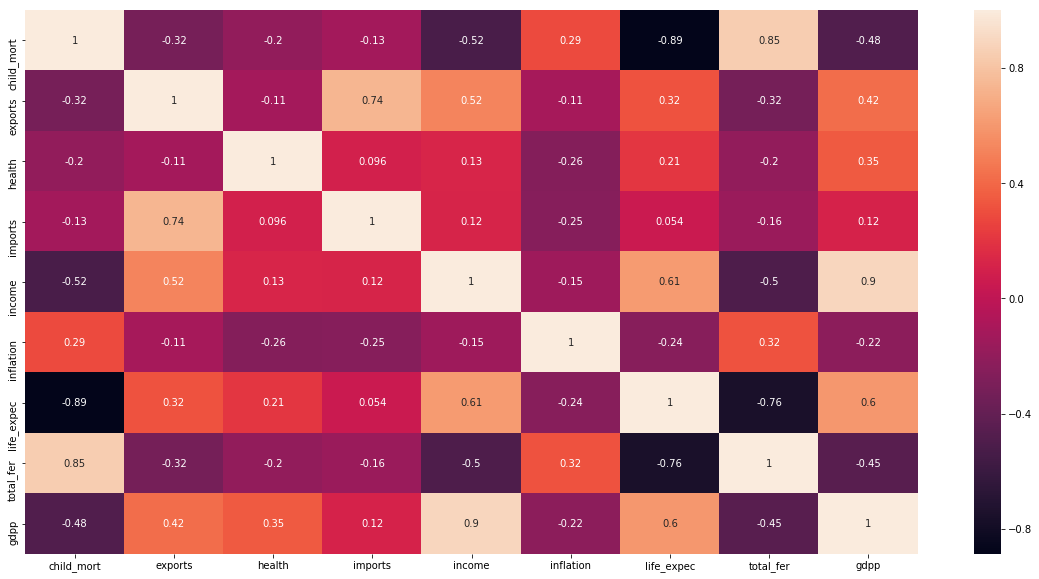

In [17]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(Country_df.corr(),annot = True)

### PCA on the data

#### Note - 
- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [18]:
Country_df.shape


(167, 9)

In [19]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=5)

In [20]:
#Doing the PCA 
pca.fit(Country_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=5,
  svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [21]:
pca.components_

array([[-8.07327698e-04,  5.11347930e-04,  2.52724061e-05,
         1.14384206e-04,  7.26746756e-01, -7.66030641e-05,
         2.13850032e-04, -2.87952778e-05,  6.86904777e-01],
       [-5.57055026e-04,  9.41707880e-04, -2.15627987e-04,
         5.41880243e-05,  6.86903991e-01,  2.85600449e-04,
         2.66353737e-05, -2.40728708e-05, -7.26747258e-01],
       [ 9.25216235e-01, -2.28625679e-01, -9.25844583e-03,
        -2.42701895e-01,  1.17358487e-03,  8.73847023e-02,
        -1.55747242e-01,  2.86462535e-02,  1.16146489e-04],
       [ 3.28781524e-01,  6.52815538e-01, -7.58656979e-03,
         6.78156564e-01, -4.12815388e-04, -2.19868421e-02,
        -7.23208668e-02,  8.16962267e-03,  2.44966906e-04],
       [-3.94778884e-02,  5.94991365e-01, -7.77529934e-02,
        -5.29182820e-01, -6.84011540e-04,  5.95865038e-01,
         5.69358863e-02,  7.02431804e-03,  3.74361566e-04],
       [-6.08332956e-02, -4.01983695e-01,  5.54274180e-02,
         4.41408925e-01,  1.95006777e-04,  7.978554

In [22]:
colnames = list(Country_df.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'PC4':pca.components_[3], 'Feature':colnames})
pcs_df

,PC1,PC2,PC3,PC4,Feature
0,-0.000807,-0.000557,0.925216,0.328782,child_mort
1,0.000511,0.000942,-0.228626,0.652816,exports
2,0.000025,-0.000216,-0.009258,-0.007587,health
3,0.000114,0.000054,-0.242702,0.678157,imports
4,0.726747,0.686904,0.001174,-0.000413,income
5,-0.000077,0.000286,0.087385,-0.021987,inflation
6,0.000214,0.000027,-0.155747,-0.072321,life_expec
7,-0.000029,-0.000024,0.028646,0.008170,total_fer
8,0.686905,-0.726747,0.000116,0.000245,gdpp


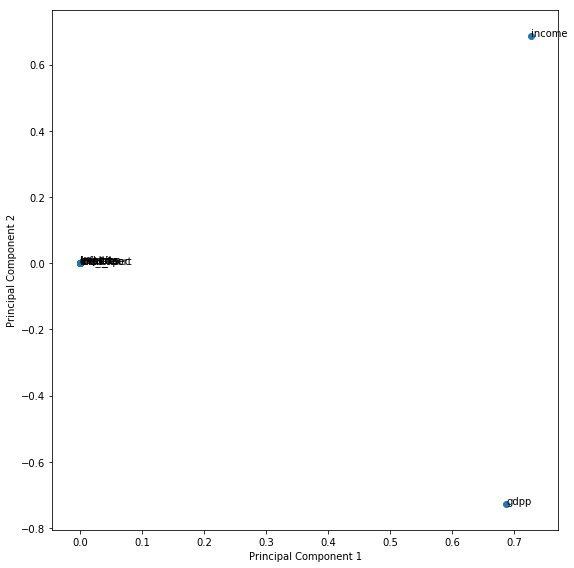

In [23]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

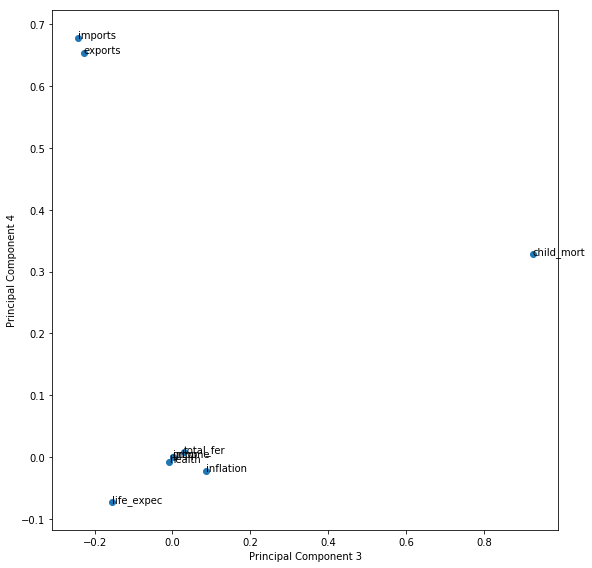

In [24]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC3, pcs_df.PC4)
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC3[i],pcs_df.PC4[i]))
plt.tight_layout()
plt.show()

#### Looking at the screeplot to assess the number of needed principal components

In [25]:
pca.explained_variance_ratio_

array([9.47923065e-01, 5.20734600e-02, 1.76794623e-06, 1.38688879e-06,
       1.90997340e-07, 1.03864038e-07, 1.82060955e-08, 5.98918161e-09,
       8.64921500e-10])

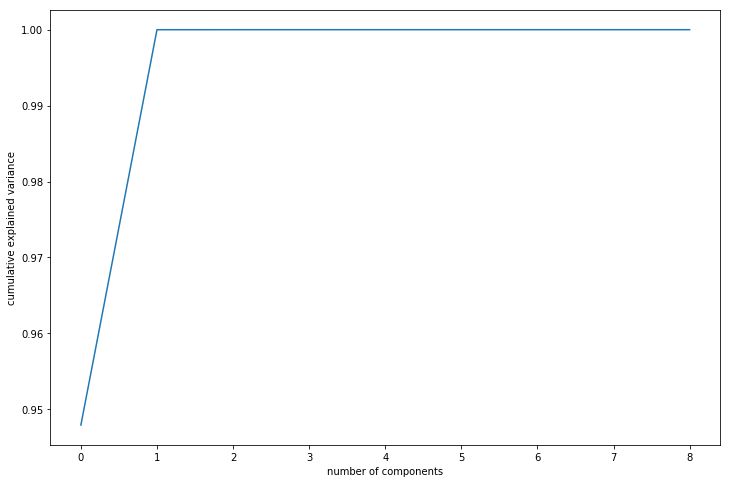

In [26]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [27]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)


In [28]:
df_train_pca = pca_final.fit_transform(Country_df)
df_train_pca.shape

(167, 4)

In [29]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

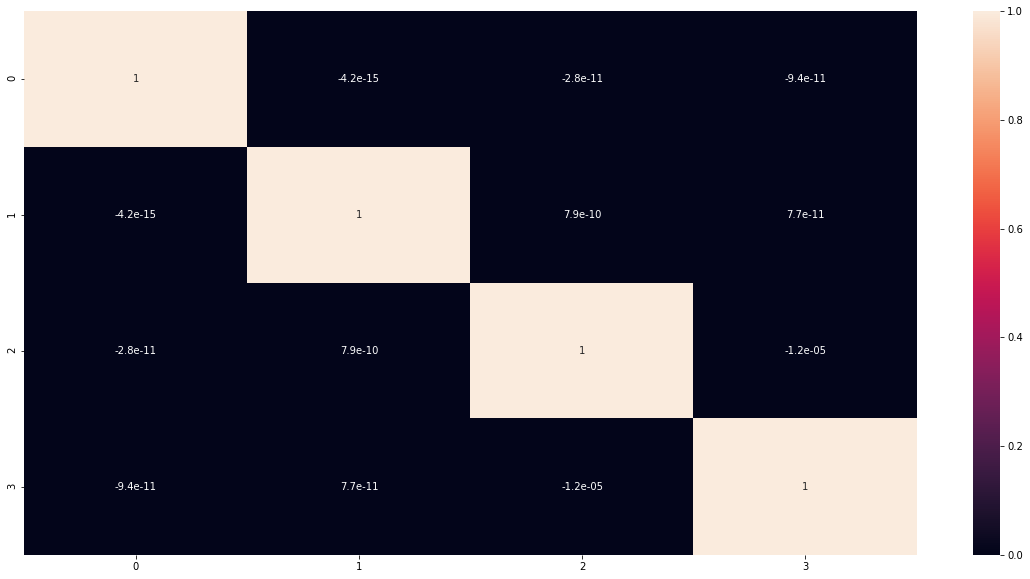

In [30]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [31]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 7.896672019315362e-10 , min corr:  -1.2405112051965963e-05


#### Basis transformation - getting the data onto our PCs

In [32]:
df_train_pca = pca_final.fit_transform(Country_df)
df_train_pca.shape

(167, 4)

In [33]:
conc = np.vstack(df_train_pca)

In [34]:
pca_df = pd.DataFrame(conc)

In [35]:
pca_df

,0,1,2,3
0,-19815.128018,1651.124720,38.429374,-0.221505
1,-11338.938992,-1493.469028,-28.179904,-14.086388
2,-8926.352589,-3264.684102,-11.922065,-16.776265
3,-14652.465937,867.795270,59.551671,40.540800
4,896.142032,-1898.478152,-29.130644,0.490998
5,-699.699306,-3004.511711,-7.608719,-45.210902
6,-14283.944388,92.967224,-27.463284,-19.244888
7,44372.702514,11635.452719,10.791524,-43.728750
8,42246.342149,6765.258443,-1.694857,-6.957945
9,-5725.513089,-4391.181823,2.753397,-10.096212


# Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

If the value is between {0.01, ...,0.3}, the data is regularly spaced.

If the value is around 0.5, it is random.

If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

Some usefull links to understand Hopkins Statistics:

Article

In [36]:

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans


In [37]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H



In [38]:
hopkins(pca_df)

NameError: name 'NearestNeighbors' is not defined

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [39]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(pca_df)
    sse_.append([k, silhouette_score(pca_df, kmeans.labels_)])

In [40]:
#K-Means with some K
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(pca_df)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

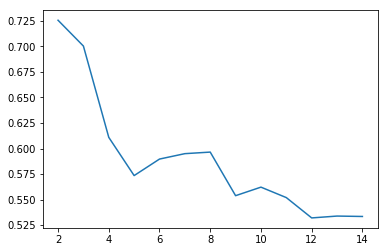

In [41]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [42]:
# Applying k-means to the Countries dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(pca_df)

X = pca_df.as_matrix(columns=None)

C:\Users\vinay\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


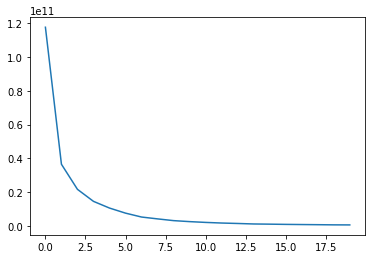

In [43]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pca_df)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [44]:
pca_df.columns = ["PCA1", "PAC2",'PAC3','PCA4']

In [45]:
kcluster=pd.concat([Country, pca_df], axis=1, join='outer',)

In [46]:
# analysis of clusters formed
kcluster.index = pd.RangeIndex(len(kcluster.index))
kcluster_km = pd.concat([kcluster, pd.Series(model_clus5.labels_)], axis=1)
kcluster_km.columns = ['Country', 'PCA1', 'PCA2', 'PCA3', 'PCA4','ClusterID']

In [47]:
kcluster_km

,Country,PCA1,PCA2,PCA3,PCA4,ClusterID
0,Afghanistan,-19815.128018,1651.124720,38.429374,-0.221505,0
1,Albania,-11338.938992,-1493.469028,-28.179904,-14.086388,0
2,Algeria,-8926.352589,-3264.684102,-11.922065,-16.776265,4
3,Angola,-14652.465937,867.795270,59.551671,40.540800,0
4,Antigua and Barbuda,896.142032,-1898.478152,-29.130644,0.490998,4
5,Argentina,-699.699306,-3004.511711,-7.608719,-45.210902,4
6,Armenia,-14283.944388,92.967224,-27.463284,-19.244888,0
7,Australia,44372.702514,11635.452719,10.791524,-43.728750,1
8,Austria,42246.342149,6765.258443,-1.694857,-6.957945,1
9,Azerbaijan,-5725.513089,-4391.181823,2.753397,-10.096212,4


In [67]:
kclusters_pca1 = 	pd.DataFrame(kcluster_km.groupby(["ClusterID"]).PCA1.mean())
kclusters_pca2 = 	pd.DataFrame(kcluster_km.groupby(["ClusterID"]).PCA2.mean())
kclusters_pca3 = 	pd.DataFrame(kcluster_km.groupby(["ClusterID"]).PCA3.mean())
kclusters_pca4 = 	pd.DataFrame(kcluster_km.groupby(["ClusterID"]).PCA4.mean())

In [68]:
df = pd.concat([pd.Series([0,1,2,3,4]), kclusters_pca1, kclusters_pca2, kclusters_pca3,kclusters_pca4], axis=1)
df.columns = ["ClusterID", "PCA1_mean", "PCA2_mean", "PCA3_mean", "PCA4_mean"]
df.head()

,ClusterID,PCA1_mean,PCA2_mean,PCA3_mean,PCA4_mean
0,0,-16882.653765,798.632018,10.239467,3.902293
1,1,45630.401804,3153.922642,3.608211,-4.800415
2,2,18452.648404,-2370.424953,-10.150722,-0.323803
3,3,106464.067409,2208.686333,49.083780,20.930978
4,4,-3476.309366,-2240.998862,-21.352805,-6.874970


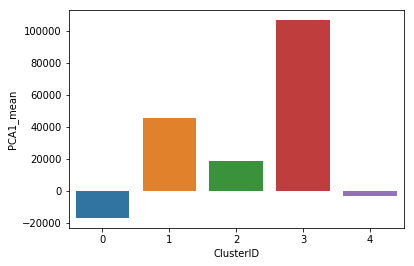

In [69]:
sns.barplot(x=df.ClusterID, y=df.PCA1_mean)


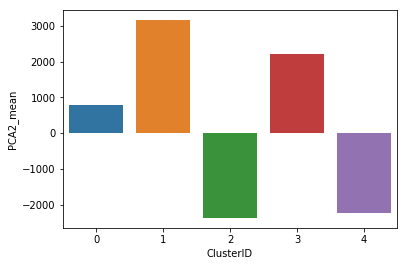

In [70]:
sns.barplot(x=df.ClusterID, y=df.PCA2_mean)

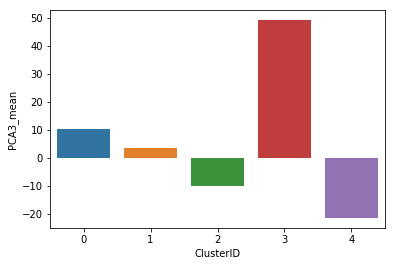

In [71]:
sns.barplot(x=df.ClusterID, y=df.PCA3_mean)

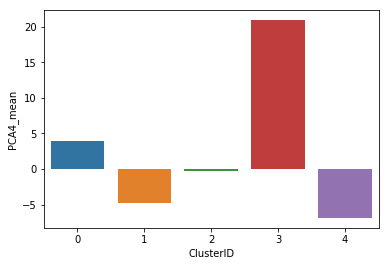

In [72]:
sns.barplot(x=df.ClusterID, y=df.PCA4_mean)

In [79]:
df_variables=pd.concat([kcluster_km, Country_df], axis=1, join='outer')
df_variables

,Country,PCA1,PCA2,PCA3,PCA4,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-19815.128018,1651.124720,38.429374,-0.221505,0,90.2,10.00,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,-11338.938992,-1493.469028,-28.179904,-14.086388,0,16.6,28.00,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,-8926.352589,-3264.684102,-11.922065,-16.776265,4,27.3,38.40,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,-14652.465937,867.795270,59.551671,40.540800,0,119.0,62.30,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,896.142032,-1898.478152,-29.130644,0.490998,4,10.3,45.50,6.03,58.9,19100,1.44,76.8,2.13,12200
5,Argentina,-699.699306,-3004.511711,-7.608719,-45.210902,4,14.5,18.90,8.10,16.0,18700,20.90,75.8,2.37,10300
6,Armenia,-14283.944388,92.967224,-27.463284,-19.244888,0,18.1,20.80,4.40,45.3,6700,7.77,73.3,1.69,3220
7,Australia,44372.702514,11635.452719,10.791524,-43.728750,1,4.8,19.80,8.73,20.9,41400,1.16,82.0,1.93,51900
8,Austria,42246.342149,6765.258443,-1.694857,-6.957945,1,4.3,51.30,11.00,47.8,43200,0.87,80.5,1.44,46900
9,Azerbaijan,-5725.513089,-4391.181823,2.753397,-10.096212,4,39.2,54.30,5.88,20.7,16000,13.80,69.1,1.92,5840


In [ ]:
df = pd.concat([pd.Series([0,1,2,3,4]), kclusters_pca1, kclusters_pca2, kclusters_pca3,kclusters_pca4], axis=1)
df.columns = ["ClusterID", "PCA1_mean", "PCA2_mean", "PCA3_mean", "PCA4_mean"]
df.head()

In [81]:
dfvariables_gdpp = pd.DataFrame(df_variables.groupby(["ClusterID"]).gdpp.mean())
dfvariables_income= pd.DataFrame(df_variables.groupby(["ClusterID"]).income.mean())
df_variables

,Country,PCA1,PCA2,PCA3,PCA4,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-19815.128018,1651.124720,38.429374,-0.221505,0,90.2,10.00,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,-11338.938992,-1493.469028,-28.179904,-14.086388,0,16.6,28.00,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,-8926.352589,-3264.684102,-11.922065,-16.776265,4,27.3,38.40,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,-14652.465937,867.795270,59.551671,40.540800,0,119.0,62.30,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,896.142032,-1898.478152,-29.130644,0.490998,4,10.3,45.50,6.03,58.9,19100,1.44,76.8,2.13,12200
5,Argentina,-699.699306,-3004.511711,-7.608719,-45.210902,4,14.5,18.90,8.10,16.0,18700,20.90,75.8,2.37,10300
6,Armenia,-14283.944388,92.967224,-27.463284,-19.244888,0,18.1,20.80,4.40,45.3,6700,7.77,73.3,1.69,3220
7,Australia,44372.702514,11635.452719,10.791524,-43.728750,1,4.8,19.80,8.73,20.9,41400,1.16,82.0,1.93,51900
8,Austria,42246.342149,6765.258443,-1.694857,-6.957945,1,4.3,51.30,11.00,47.8,43200,0.87,80.5,1.44,46900
9,Azerbaijan,-5725.513089,-4391.181823,2.753397,-10.096212,4,39.2,54.30,5.88,20.7,16000,13.80,69.1,1.92,5840


In [80]:
sns.barplot(x=df_variables.ClusterID, y=dfvariables_income)

ValueError: Wrong number of items passed 1, placement implies 5

In [ ]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
# heirarchical clustering
mergings = linkage(pca_df, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
mergings = linkage(pca_df, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
KFM_hc = pd.concat([kcluster, clusterCut], axis=1)
KFM_hc.columns = ['Country', 'PCA1', 'PCA2', 'PCA3', 'PCA4','ClusterID']

In [ ]:
#summarise
km_clusters_PCA1 = 	pd.DataFrame(KFM_hc.groupby(["ClusterID"]).PCA1.mean())
km_clusters_PCA2 = 	pd.DataFrame(KFM_hc.groupby(["ClusterID"]).PCA2.mean())
km_clusters_PCA3 = 	pd.DataFrame(KFM_hc.groupby(["ClusterID"]).PCA3.mean())
km_clusters_PCA4 = 	pd.DataFrame(KFM_hc.groupby(["ClusterID"]).PCA4.mean())

In [ ]:
df = pd.concat([pd.Series([0,1,2,3,4]),km_clusters_PCA1, km_clusters_PCA2, km_clusters_PCA3,km_clusters_PCA4], axis=1)
df.columns = ["ClusterID", "PCA1_mean", "PCA2_mean", "PCA3_mean",'PCA4_mean']
df.head()

In [ ]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.PCA1_mean)

In [ ]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.PCA2_mean)

In [ ]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.PCA3_mean)

In [ ]:
#plotting barplot
sns.barplot(x=df.ClusterID, y=df.PCA4_mean)